In [20]:

import pandas as pd
import numpy as np 
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt 
import math
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import seaborn as sns 

In [2]:
# file_path = 'E:\Year_2_Semester_1\chemometrics\Exercises\M1\New_M2\Results\New_M2_results.csv'
df = pd.read_csv('New_M2_results.csv')

In [3]:
# change response to viscosity
df = df.rename(columns={'Response':'Viscosity'})
df

,Screen,pH,Speed,Viscosity
0,1,3,20,-1.98
1,1,3,60,3.04
2,1,3,100,0.37
3,1,6,20,-2.94
4,1,6,60,5.89
5,1,6,100,0.61
6,1,9,20,-6.60
7,1,9,60,7.17
8,1,9,100,1.11
9,2,4,60,3.44


In [4]:
# convert it to csv
Const_speed = df[df['Speed']==60].to_csv('Const_speed.csv', index=False)
df = pd.read_csv('Const_speed.csv')

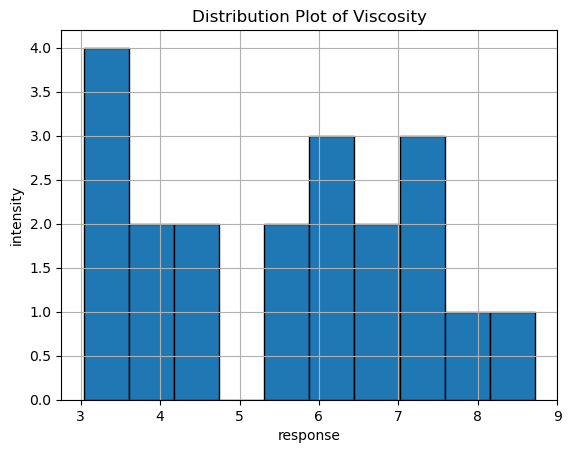

In [5]:
## test if normal distributed

#histgram
df['Viscosity'].hist(bins=10, edgecolor='black')
plt.title('Distribution Plot of Viscosity')
plt.xlabel('response')
plt.ylabel('intensity')
plt.show()


In [6]:
# Shapiro-wilks
nor_result = stats.shapiro(df['Viscosity'])
print(nor_result)

ShapiroResult(statistic=0.9437963894698387, pvalue=0.2825510611227856)


P_value = 0.5611 greater than 0.05, the data is normally distributed. 
Use ANOVA test.

In [7]:
# Extract each column from df
pH = df['pH']
Speed = df['Speed']

In [8]:
# create the model
# syntax ols('dependent_variable ~ independent_variable', data=dataset).fit()
model = ols('Viscosity ~ pH * Speed', data = df).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
# anova_result_decimal = "{:.10f}".format(anova_result['PR(>F)'])
# # p_value = "{:.12f}".format(p_value)

# print(anova_result['PR(>F)'])
print(anova_result)

                sum_sq    df             F        PR(>F)
pH        1.871523e-07   1.0  2.652093e-07  9.995948e-01
Speed     6.279842e+02   1.0  8.899023e+02  8.856982e-17
pH:Speed  4.558726e+01   1.0  6.460067e+01  2.292853e-07
Residual  1.270220e+01  18.0           NaN           NaN


In [9]:
# plt.figure(figsize=(10, 12))
    
    
# ax = plt.axes(111, projection='3d')
# fg = ax.scatter3D(df['pH'], df['Speed'], df['Viscosity'], 
#                   cmap='coolwarm')

# # Set axis labels and title
# ax.set_xlabel('pH', fontweight='bold', fontsize=12)
# ax.set_ylabel('Speed', fontweight='bold',fontsize=12)
# ax.set_zlabel('Viscosity', fontweight='bold',fontsize=12)
# plt.title('3D plot')
# # Set angle in case zlabel can't show
# ax.view_init(elev=20, azim=30)
# plt.tight_layout()
# # Display the plot
# plt.show()

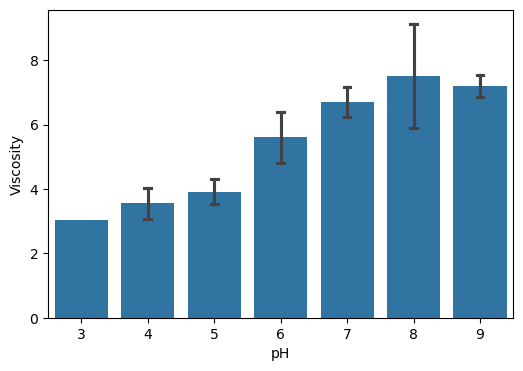

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='pH', y='Viscosity', errorbar='sd', capsize=0.1)
plt.show()

In [11]:
from scipy.stats import ttest_ind
from itertools import combinations

In [12]:
# post-hoc with T-test

levels = df['pH'].unique()
print(f'T-test of variable: pH')
for level1, level2 in combinations(levels, 2):
  group1 = df[df['pH'] == level1]['Viscosity'] 
  group2 = df[df['pH'] == level2]['Viscosity']
  t_stat, p_value = ttest_ind(group1, group2)
  print(f"{level1} vs {level2}: t_statistic: {t_stat}")
  if p_value < 0.05:
    print(f"{level1} vs {level2}: p_value: {p_value:.5f}")
  else:
    print('No significant difference')

T-test of variable: pH
3 vs 6: t_statistic: -2.8843497745485984
No significant difference
3 vs 9: t_statistic: -10.881806936593756
3 vs 9: p_value: 0.00834
3 vs 4: t_statistic: -0.9305082155902543
No significant difference
3 vs 5: t_statistic: -1.9433025970293138
No significant difference
3 vs 7: t_statistic: -6.818429173923785
3 vs 7: p_value: 0.02084
3 vs 8: t_statistic: -2.4034733424988373
No significant difference
6 vs 9: t_statistic: -3.195013128223247
6 vs 9: p_value: 0.02413
6 vs 4: t_statistic: 3.927556149982521
6 vs 4: p_value: 0.01110
6 vs 5: t_statistic: 3.332207051555767
6 vs 5: p_value: 0.02073
6 vs 7: t_statistic: -2.0936749400480092
No significant difference
6 vs 8: t_statistic: -2.086784516750849
No significant difference
9 vs 4: t_statistic: 10.917098115738975
9 vs 4: p_value: 0.00040
9 vs 5: t_statistic: 11.09758751895106
9 vs 5: p_value: 0.00038
9 vs 7: t_statistic: 1.5077450399414176
No significant difference
9 vs 8: t_statistic: -0.3235027639461909
No significant d

In [13]:
# post-hoc with Tukry HSD Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [14]:
pH_tukey = pairwise_tukeyhsd(df['Viscosity'], df['pH'])
print(pH_tukey)



Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      4     0.51 0.9974 -2.7112 3.7312  False
     3      5   0.8767 0.9586 -2.3445 4.0978  False
     3      6   2.5675 0.1386 -0.5514 5.6864  False
     3      7     3.66 0.0221  0.4388 6.8812   True
     3      8   4.4633  0.005  1.2422 7.6845   True
     3      9   4.1567 0.0087  0.9355 7.3778   True
     4      5   0.3667 0.9971  -1.911 2.6444  False
     4      6   2.0575 0.0613 -0.0731 4.1881  False
     4      7     3.15  0.005  0.8723 5.4277   True
     4      8   3.9533 0.0007  1.6756  6.231   True
     4      9   3.6467 0.0014   1.369 5.9244   True
     5      6   1.6908  0.163 -0.4398 3.8214  False
     5      7   2.7833 0.0132  0.5056  5.061   True
     5      8   3.5867 0.0017   1.309 5.8644   True
     5      9     3.28 0.0036  1.0023 5.5577   True
     6      7   1.0925 0.5865 -1.0381 3.2231  False
     6      

In [15]:
Speed_tukey = pairwise_tukeyhsd(df['Viscosity'], df['pH'])
print(Speed_tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      4     0.51 0.9974 -2.7112 3.7312  False
     3      5   0.8767 0.9586 -2.3445 4.0978  False
     3      6   2.5675 0.1386 -0.5514 5.6864  False
     3      7     3.66 0.0221  0.4388 6.8812   True
     3      8   4.4633  0.005  1.2422 7.6845   True
     3      9   4.1567 0.0087  0.9355 7.3778   True
     4      5   0.3667 0.9971  -1.911 2.6444  False
     4      6   2.0575 0.0613 -0.0731 4.1881  False
     4      7     3.15  0.005  0.8723 5.4277   True
     4      8   3.9533 0.0007  1.6756  6.231   True
     4      9   3.6467 0.0014   1.369 5.9244   True
     5      6   1.6908  0.163 -0.4398 3.8214  False
     5      7   2.7833 0.0132  0.5056  5.061   True
     5      8   3.5867 0.0017   1.309 5.8644   True
     5      9     3.28 0.0036  1.0023 5.5577   True
     6      7   1.0925 0.5865 -1.0381 3.2231  False
     6      

In [18]:
# linear regression

# x = df[['pH', 'Speed']]
# x = sm.add_constant(x)
# y = df['Viscosity']

# model = sm.OLS(y, x).fit()

# print(model.summary())

In [17]:
# leverage 
pH_array = df['pH'].to_numpy()
levels = df['pH'].unique()
pH_array

array([3, 6, 9, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 4, 5, 6, 7, 8],
      dtype=int64)

In [21]:
# Design Matrix
a = [1] * len(pH_array)  # create a list with same length of data_array
D = np.column_stack([a, pH_array]) # create matrxi with 1st column:1 and 2nd column value

In [22]:
D_T = D.T 

# D^T D 
D_T_D = np.dot(D_T, D)

# inverse of D^T D
D_T_D_inv = np.linalg.inv(D_T_D)

# multiply (1)D (2)D^T D^(-1) (3)D^T
H = np.dot(np.dot(D, D_T_D_inv), D_T)

In [34]:
df_pH_sorted = df.sort_values('pH', ascending=False)
pH_levels = df_pH_sorted['pH']

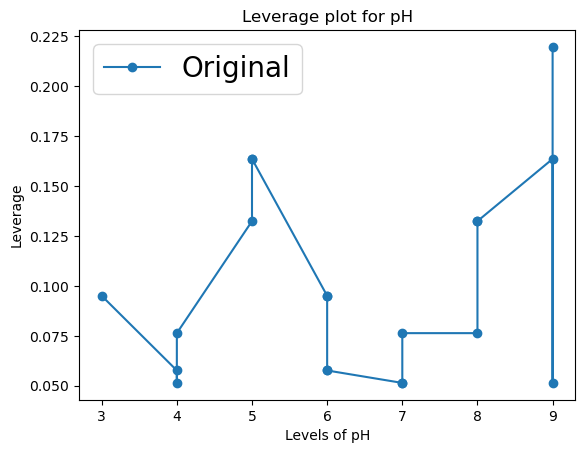

In [35]:
leverge = np.diagonal(H)
plt.plot(pH_levels, leverge, 'o-', label='Original')
plt.xlabel('Levels of pH')
plt.ylabel('Leverage')
plt.legend(loc = 'upper left', fontsize=20)
plt.title('Leverage plot for pH')
plt.show()